In [9]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import keras

In [10]:
%matplotlib inline

In [11]:
DIRECTORY='/content/drive/MyDrive/washinghandsproject'

In [4]:
CATEGORIES = ['notwashedhands', 'washedhands']

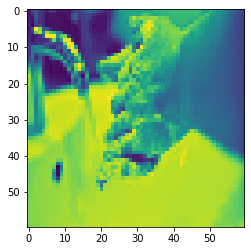

In [12]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])
        plt.imshow(new_arr)

In [13]:
data

[[array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ..

In [14]:
data[0][1]

0

In [15]:
import random

random.shuffle(data)

In [16]:
X = []
y = []

In [17]:
for features, label in data:
    X.append(features)
    y.append(label)

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X

array([[[234,  62, 231, ...,  84,  82, 170],
        [194, 179, 149, ...,  83,  89, 100],
        [122,  34, 148, ...,  55,  63, 245],
        ...,
        [158, 156, 175, ...,  42,  46,  53],
        [210, 141, 141, ...,  47,  50,  56],
        [190, 169, 189, ...,  52,  55,  57]],

       [[241, 239, 239, ..., 251, 249, 246],
        [241, 239, 239, ..., 253, 247, 246],
        [242, 240, 239, ..., 244, 246, 246],
        ...,
        [168, 192, 198, ..., 173, 173, 181],
        [ 86,  72,  81, ..., 213, 204, 191],
        [125, 117, 103, ..., 161, 159, 155]],

       [[233, 235, 236, ..., 251, 250, 251],
        [233, 235, 237, ..., 251, 250, 251],
        [233, 235, 238, ..., 251, 250, 251],
        ...,
        [202, 204, 185, ..., 204, 203, 203],
        [ 46,  43,  42, ...,  45,  44,  44],
        [ 43,  43,  46, ...,  45,  45,  45]],

       ...,

       [[246, 246, 246, ..., 246, 246, 246],
        [246, 246, 246, ..., 246, 246, 246],
        [246, 246, 246, ..., 246, 246, 246

In [20]:
y

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [21]:
import pickle

In [22]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [23]:
X

array([[[234,  62, 231, ...,  84,  82, 170],
        [194, 179, 149, ...,  83,  89, 100],
        [122,  34, 148, ...,  55,  63, 245],
        ...,
        [158, 156, 175, ...,  42,  46,  53],
        [210, 141, 141, ...,  47,  50,  56],
        [190, 169, 189, ...,  52,  55,  57]],

       [[241, 239, 239, ..., 251, 249, 246],
        [241, 239, 239, ..., 253, 247, 246],
        [242, 240, 239, ..., 244, 246, 246],
        ...,
        [168, 192, 198, ..., 173, 173, 181],
        [ 86,  72,  81, ..., 213, 204, 191],
        [125, 117, 103, ..., 161, 159, 155]],

       [[233, 235, 236, ..., 251, 250, 251],
        [233, 235, 237, ..., 251, 250, 251],
        [233, 235, 238, ..., 251, 250, 251],
        ...,
        [202, 204, 185, ..., 204, 203, 203],
        [ 46,  43,  42, ...,  45,  44,  44],
        [ 43,  43,  46, ...,  45,  45,  45]],

       ...,

       [[246, 246, 246, ..., 246, 246, 246],
        [246, 246, 246, ..., 246, 246, 246],
        [246, 246, 246, ..., 246, 246, 246

In [24]:
y

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


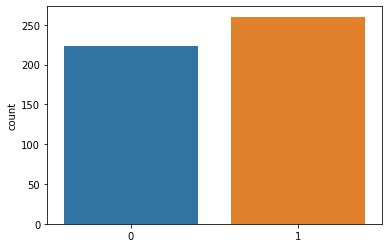

In [25]:
import seaborn as sns
sns.countplot(y)

In [26]:
X = X/255

In [27]:
X

array([[[0.91764706, 0.24313725, 0.90588235, ..., 0.32941176,
         0.32156863, 0.66666667],
        [0.76078431, 0.70196078, 0.58431373, ..., 0.3254902 ,
         0.34901961, 0.39215686],
        [0.47843137, 0.13333333, 0.58039216, ..., 0.21568627,
         0.24705882, 0.96078431],
        ...,
        [0.61960784, 0.61176471, 0.68627451, ..., 0.16470588,
         0.18039216, 0.20784314],
        [0.82352941, 0.55294118, 0.55294118, ..., 0.18431373,
         0.19607843, 0.21960784],
        [0.74509804, 0.6627451 , 0.74117647, ..., 0.20392157,
         0.21568627, 0.22352941]],

       [[0.94509804, 0.9372549 , 0.9372549 , ..., 0.98431373,
         0.97647059, 0.96470588],
        [0.94509804, 0.9372549 , 0.9372549 , ..., 0.99215686,
         0.96862745, 0.96470588],
        [0.94901961, 0.94117647, 0.9372549 , ..., 0.95686275,
         0.96470588, 0.96470588],
        ...,
        [0.65882353, 0.75294118, 0.77647059, ..., 0.67843137,
         0.67843137, 0.70980392],
        [0.3

In [28]:
X = X.reshape(-1, 60, 60, 1)

In [29]:
X

array([[[[0.91764706],
         [0.24313725],
         [0.90588235],
         ...,
         [0.32941176],
         [0.32156863],
         [0.66666667]],

        [[0.76078431],
         [0.70196078],
         [0.58431373],
         ...,
         [0.3254902 ],
         [0.34901961],
         [0.39215686]],

        [[0.47843137],
         [0.13333333],
         [0.58039216],
         ...,
         [0.21568627],
         [0.24705882],
         [0.96078431]],

        ...,

        [[0.61960784],
         [0.61176471],
         [0.68627451],
         ...,
         [0.16470588],
         [0.18039216],
         [0.20784314]],

        [[0.82352941],
         [0.55294118],
         [0.55294118],
         ...,
         [0.18431373],
         [0.19607843],
         [0.21960784]],

        [[0.74509804],
         [0.6627451 ],
         [0.74117647],
         ...,
         [0.20392157],
         [0.21568627],
         [0.22352941]]],


       [[[0.94509804],
         [0.9372549 ],
         [0.93

In [30]:
!pip install autokeras

     |████████████████████████████████| 174kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=d42a56186b92a77cfaea2fec11aac52308f838bc20014c4d939194a3331f13e6
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=c93f208e1e4839ca4862de5d12ab35c15d607ddf202ca53a8aab376bdb088571
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [31]:
from keras.utils import normalize, to_categorical

import autokeras as ak

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print(X_train.shape)  #50K


print(y_test.shape)  #

(362, 60, 60, 1)
(121,)


In [32]:



#Documentation: https://autokeras.com/image_classifier/
clf = ak.ImageClassifier(max_trials=2) #MaxTrials - max. number of keras models to try
clf.fit(X_train, y_train, epochs=1)

#Evaluate the classifier on test data
_, acc = clf.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

# get the final best performing model
model = clf.export_model()
print(model.summary())

#Save the model
model.save('wh_model.h5')


Trial 2 Complete [00h 03m 49s]
val_loss: 540.7239990234375

Best val_loss So Far: 0.6443689465522766
Total elapsed time: 00h 03m 54s
INFO:tensorflow:Oracle triggered exit
12/12 [==============================] - 5s 345ms/step - loss: 0.6859 - accuracy: 0.6265
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets
4/4 [==============================] - 0s 86ms/step - loss: 0.4818 - accuracy: 0.8017
Accuracy =  80.16529083251953 %
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 1)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 60, 60, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 60, 60, 1)         3         
_________________________________________________________________
conv2d 

In [33]:
CATEGORIES = ['notwashedhands', 'washedhands']


def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr


In [34]:
prediction = model.predict([image('barehands.jpg')])
print(CATEGORIES[prediction.argmax()])

notwashedhands


In [41]:
y_pred=clf.predict(X_test)

In [42]:

print(confusion_matrix(y_test, y_pred, ))



[[36 18]
 [ 6 61]]


In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[36 18]
 [ 6 61]]
